# Importing the Libraries

In [2]:
# For data manipulation
import pandas as pd
import numpy as np

# For Plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

# For Machine Learning Algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# For ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# Data Ingestion

In [3]:
# Loading of datasets
data = pd.read_csv('Titanic_gender_submission.csv')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Data Understanding

In [4]:
# Displaying of Titanic_gender_submission Data
data.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [5]:
data.tail(10)

,PassengerId,Survived
408,1300,1
409,1301,1
410,1302,1
411,1303,1
412,1304,1
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [6]:
# Displaying of Train Data
train_data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [7]:
train_data.tail(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [8]:
# Displaying of Test Data
test_data.head(6)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


In [9]:
test_data.tail(6)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [10]:
# Displaying of Titanic_gender_submission Data Information
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [11]:
# Displaying of Train Data Information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# Displaying of Test Data Information
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [13]:
# Displaying of Train Data Description
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# Displaying of Test Data Description
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Data Preparation

In [15]:
# Removal of Duplicate Rows
liste = [train_data, test_data]
for i in liste:
    print("Duplicate Data Sum:", i.duplicated().sum())
    if i.duplicated().sum() != 0:
        print("Before Removing Duplicates:", i.shape[0])
        i.drop_duplicates()
        print("After Removing Duplicates:", i.shape[0])

Duplicate Data Sum: 0
Duplicate Data Sum: 0


In [16]:
# Checking of Missing Values on the Train Data
Train_Null_Counts = train_data.isnull().sum()
print(Train_Null_Counts)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [17]:
# Checking of Missing Values on the Test Data
Test_Null_Counts = test_data.isnull().sum()
print(Test_Null_Counts)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [18]:
# Fill Missing Values for Train Data
train_data.Age.fillna(29.5, inplace = True)
train_data.Embarked.fillna("S", inplace = True)

# Fill Missing Values for Test Data
test_data.Age.fillna(29.5, inplace = True)
test_data.Fare.fillna(test_data.Fare.median(), inplace = True)

In [19]:
# Drop Unnesesary Columns
train_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)
test_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

# Insert Survived Coloumn
test_data.insert(0, "Survived", data["Survived"])

# Concat Train Data and Test Data
df = pd.concat([train_data, test_data], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 92.0+ KB


In [20]:
# Dataframe
df.shape

(1309, 8)

## Nunique & Unique Values

In [21]:
# Exploring Nunique Values
column_names = list(df.columns)
for col_name in column_names:
 print(col_name, ":", df[col_name].nunique())

Survived : 2
Pclass : 3
Sex : 2
Age : 99
SibSp : 7
Parch : 8
Fare : 281
Embarked : 3


In [22]:
# Exploring Unique Values
cols = ["Pclass", "Embarked"]
for col in cols:
    if isinstance(col, str):
        print(f"{col}:", df[col].unique())

Pclass: [3 1 2]
Embarked: ['S' 'C' 'Q']


# Exploratory Data Analysis

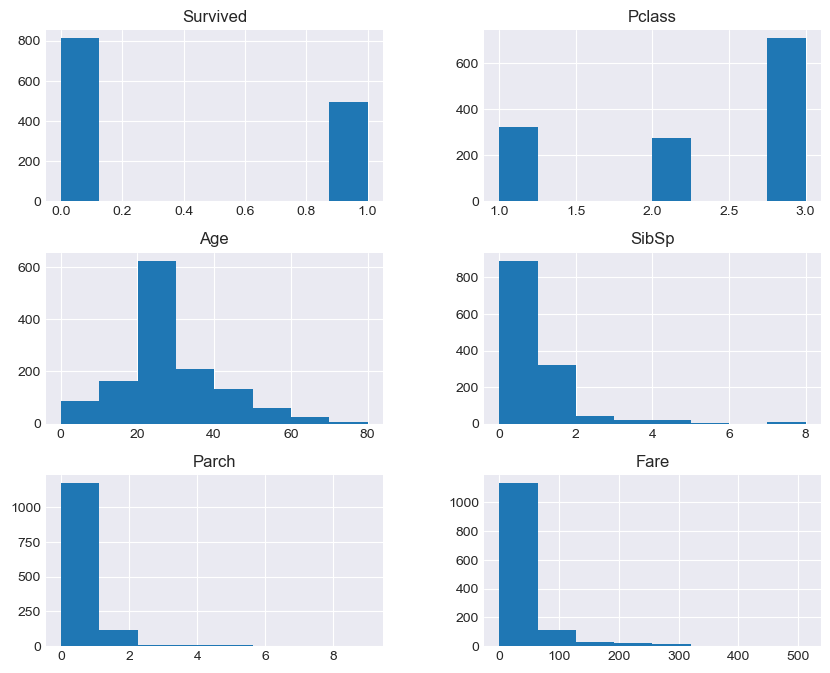

In [23]:
# General Passenger Profile (Historgram)

df.hist(bins=8, figsize=(10,8))
plt.show()

### Percental of Survivors according to Socio-Economic Class

In [24]:
# Dataframe of Survival by Socio-Economic Class

pclass = df.groupby(["Pclass", "Survived"]).size().reset_index(name="Count")
pclass = pd.DataFrame(pclass)
pclass["Percentage"] = round(pclass["Count"] *100/ len(df),2)
pclass

,Pclass,Survived,Count,Percentage
0,1,0,116,8.86
1,1,1,207,15.81
2,2,0,161,12.30
3,2,1,116,8.86
4,3,0,535,40.87
5,3,1,174,13.29


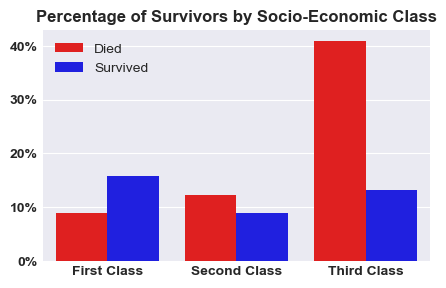

In [25]:
# Graph of Survivors by Socio-Economic Class

plt.figure(figsize=(5,3))
colour = ["red", "blue"]
ax = sns.barplot(x = "Pclass", y = "Percentage", data=pclass, hue="Survived", palette=colour)
ax.set_title("Percentage of Survivors by Socio-Economic Class", weight = "bold")
ax.set_xticklabels(["First Class", "Second Class", "Third Class"], weight = "bold")
vals = ax.get_yticks()
ax.set_yticklabels([f"{x:g}%" for x in vals], weight = "bold")
ax.set(xlabel= None, ylabel= None)
handles, labels = ax.get_legend_handles_labels()
labels = ["Died", "Survived"]
ax.legend(handles, labels)
plt.show()


### Percental of Survivors according to Gender

In [32]:
# Dataframe of Survival by Gender
gender = df.groupby(["Sex", "Survived"]).size().reset_index(name="Count")
gender = pd.DataFrame(gender)
gender["Percentage"] = round(gender["Count"] * 100/len(df),2)
gender

,Sex,Survived,Count,Percentage
0,female,0,99,7.56
1,female,1,367,28.04
2,male,0,713,54.47
3,male,1,130,9.93


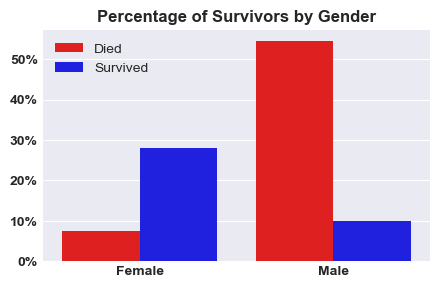

In [33]:
# Graph of Survivors by Gender
plt.figure(figsize=(5,3))
colour = ["red", "blue"]
ax = sns.barplot(x = "Sex", y = "Percentage", data=gender, hue="Survived", palette=colour)
ax.set_title("Percentage of Survivors by Gender", weight = "semibold")
ax.set_xticklabels(["Female", "Male"], weight = "bold")
vals = ax.get_yticks()
ax.set_yticklabels([f"{x:g}%" for x in vals], weight = "bold")
ax.set(xlabel= None, ylabel= None) # Hiding axis text
handles, labels = ax.get_legend_handles_labels()
labels = ["Died", "Survived"]
ax.legend(handles, labels)
plt.show()


### Probability of Survival based on Age

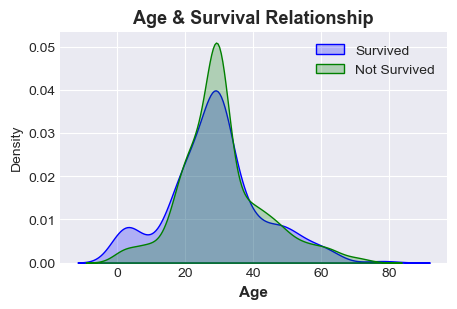

In [34]:
# Relationship between Age and Survival
plt.figure(figsize=(5,3))
ax = sns.kdeplot(df["Age"][df.Survived == 1.0], color= "blue", fill="Fill")
sns.kdeplot(df["Age"][df.Survived == 0.0], color="green", fill="Fill")
plt.legend(["Survived", "Not Survived"])
plt.title("Age & Survival Relationship", fontsize=13, fontweight="bold")
ax.set_xlabel(xlabel="Age", fontsize=11, fontweight="bold")
plt.show()

### Probability of Survival of those with siblings/spouse

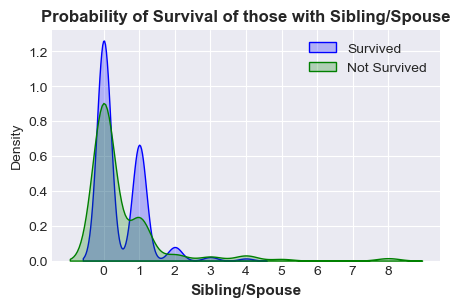

In [35]:
# SibSp and Survival Relationship
plt.figure(figsize=(5,3))
ax = sns.kdeplot(df["SibSp"][df.Survived == 1.0], color= "blue", fill="Fill")
sns.kdeplot(df["SibSp"][df.Survived == 0.0], color="green", fill="Fill")
plt.legend(["Survived", "Not Survived"])
plt.title("Probability of Survival of those with Sibling/Spouse", fontsize=12, fontweight="bold")
ax.set_xlabel(xlabel="Sibling/Spouse", fontsize=11, fontweight="bold")
plt.xticks(np.arange(0,9,1))
plt.show()

### Probability of Survival of those  with parents/children

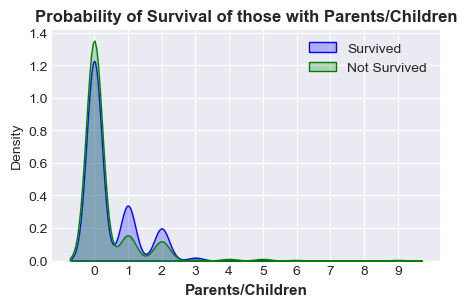

In [36]:
# Parch and Survival Relationship
plt.figure(figsize=(5,3))
ax = sns.kdeplot(df["Parch"][df.Survived == 1.0], color= "blue", fill="Fill")
sns.kdeplot(df["Parch"][df.Survived == 0.0], color="green", fill="Fill")
plt.legend(["Survived", "Not Survived"])
plt.title("Probability of Survival of those with Parents/Children", fontsize=12, fontweight="bold")
ax.set_xlabel(xlabel="Parents/Children", fontsize=11, fontweight="bold")
plt.xticks(np.arange(0,10,1))
plt.show()

### Passenger(Fare & Survival) Relationship

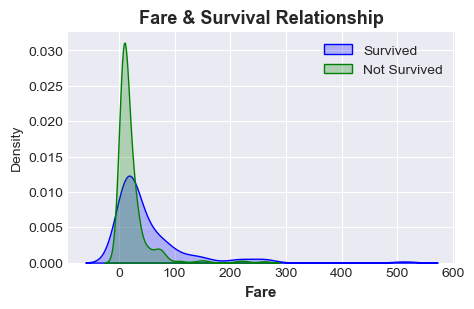

In [37]:
# Fare and Survival Relationship
plt.figure(figsize=(5,3))
ax = sns.kdeplot(df["Fare"][df.Survived == 1.0], color= "blue", fill="Fill")
sns.kdeplot(df["Fare"][df.Survived == 0.0], color="green", fill="Fill")
plt.legend(["Survived", "Not Survived"])
plt.title("Fare & Survival Relationship", fontsize=13, fontweight="bold")
ax.set_xlabel(xlabel="Fare", fontsize=11, fontweight="bold")
plt.show()

### Percental of Survivors based on Embarkation Point

In [38]:
# Dataframe of Survivors by the Embarkation Point
embark = df.groupby(["Embarked", "Survived"]).size().reset_index(name="Count")
embark = pd.DataFrame(embark)
embark["Percentage"] = round(embark["Count"] * 100/len(df),2)
embark

,Embarked,Survived,Count,Percentage
0,C,0,127,9.70
1,C,1,143,10.92
2,Q,0,73,5.58
3,Q,1,50,3.82
4,S,0,612,46.75
5,S,1,304,23.22


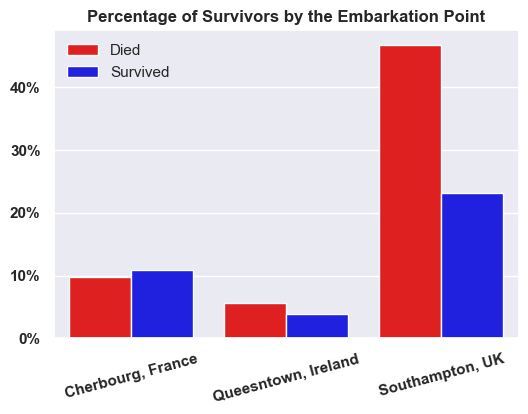

In [39]:
# Graph of Survivors by the Embarkation Point
plt.figure(figsize=(6,4))
sns.set(style="darkgrid")
colour = ["red", "blue"]
ax = sns.barplot(x = "Embarked", y = "Percentage", data=embark, hue="Survived", palette=colour)

# Set Titles
ax.set_title("Percentage of Survivors by the Embarkation Point", weight = "semibold")
ax.set_xticklabels(["Cherbourg, France", "Queesntown, Ireland", "Southampton, UK"], rotation =15, fontweight="bold")
ax.set(xlabel= None, ylabel= None) # Hiding axis text
vals = ax.get_yticks()
ax.set_yticklabels([f"{x:g}%" for x in vals], fontweight="semibold")

# Set Label
handles, labels = ax.get_legend_handles_labels()
labels = ["Died", "Survived"]
ax.legend(handles, labels)
plt.show()

# Data Modeling

## Prepare Dataset for Modeling

In [40]:
# Replacing Sex for easy count (male = 0, female = 1)
train_data["Sex"] = np.where(train_data["Sex"] == "female", 1, 0)
test_data["Sex"] = np.where(test_data["Sex"] == "female", 1, 0)

# Different Approach
train_data["Sex"] = train_data["Sex"].replace({"male": 0, "female": 1})
test_data["Sex"] = test_data["Sex"].replace({"male": 0, "female": 1})

# Display Data
display("Train Data:", train_data.head())
display("Test Data:", test_data.head())

'Train Data:'

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


'Test Data:'

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,Q
1,0,3,1,47.0,1,0,7.0000,S
2,0,2,0,62.0,0,0,9.6875,Q
3,0,3,0,27.0,0,0,8.6625,S
4,1,3,1,22.0,1,1,12.2875,S


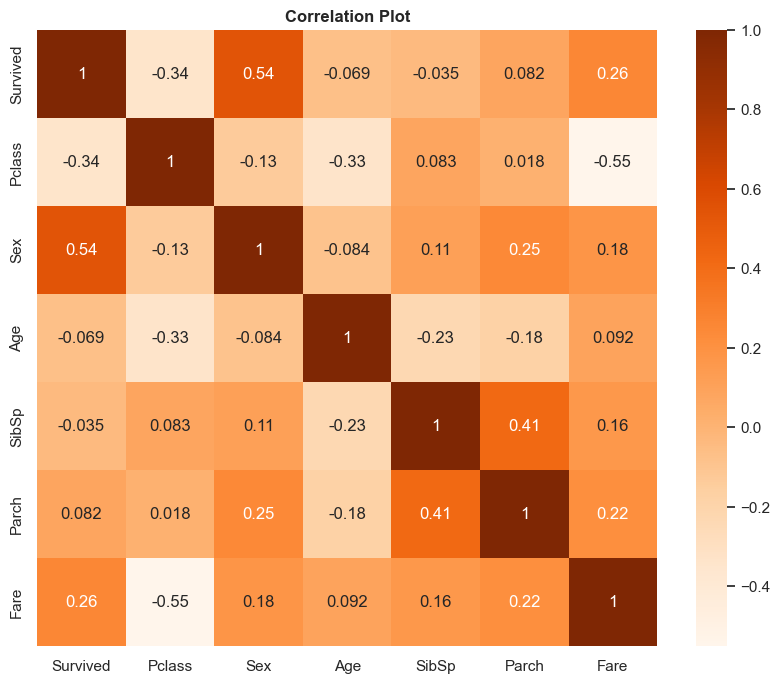

In [41]:
# Check for Correlation
corr_mat = train_data.corr(numeric_only=True)

# Showing Correlation Using Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap= "Oranges", annot_kws={"size":12})
plt.title("Correlation Plot", loc = "center", weight="bold")
plt.show()

In [42]:
# Drop Unnecessary Columns
train_data.drop(["Pclass","SibSp","Fare","Embarked"], axis=1, inplace=True)
test_data.drop(["Pclass","SibSp","Fare","Embarked"], axis=1, inplace=True)

In [43]:
# Splitting of data into Training and Testing sets
X_train = train_data.drop("Survived", axis=1)
y_train = train_data["Survived"]
X_test = test_data.drop("Survived", axis=1)
y_test = test_data["Survived"]

In [44]:
# Standardiazation (Feature Scaling)
scaler_x = StandardScaler() # Input data is transformed to have a mean of zero and variance of 1
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

## Decision Tree Regression

In [45]:
# Create Default Decision Tree Classifer Object
decisionTree_model_gini = DecisionTreeClassifier()

# Use Entropy Criterion 
decisionTree_model_entropy = DecisionTreeClassifier(criterion="entropy")

# Use Max Depth
decisionTree_model_depth = DecisionTreeClassifier(max_depth=3)

# Fit the Trees
decisionTree_model_gini.fit(X_train,y_train)
decisionTree_model_entropy.fit(X_train,y_train)
decisionTree_model_depth.fit(X_train,y_train)

# Make Prediction
y_pred_gini = decisionTree_model_gini.predict(X_test)
y_pred_entropy = decisionTree_model_entropy.predict(X_test)
y_pred_depth3 = decisionTree_model_depth.predict(X_test)

# Calculate Accuracy of the Model
print("Accuracy (Gini) :", metrics.accuracy_score(y_test, y_pred_gini))
print("Accuracy (Entropy) :", metrics.accuracy_score(y_test, y_pred_entropy))
print("Accuracy (Depth) :", metrics.accuracy_score(y_test, y_pred_depth3))

Accuracy (Gini) : 0.8014354066985646
Accuracy (Entropy) : 0.8014354066985646
Accuracy (Depth) : 0.8947368421052632


## Logistic Regression

In [46]:
# Logistic Regression Model
Log_reg = LogisticRegression()

# Train the Model
Log_reg.fit(X_train, y_train)

# Make Prediction
y_pred = Log_reg.predict(X_test)

In [47]:
# Get the Result in a Dataframe
result = {"Actual Survival":y_test, "Predicted Survival": y_pred}
result_df = pd.DataFrame(result)
result_df.head()

,Actual Survival,Predicted Survival
0,0,0
1,0,1
2,0,0
3,0,0
4,1,1


In [48]:
# Accuaracy
print("Accuarcy :", metrics.accuracy_score(y_test, y_pred))

# Check Accuarcy (For higher accuracy, Rsquared should be closer to 1 and Errors to 0)
meanAbError = metrics.mean_absolute_error(y_test, y_pred)
meanSqError = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqrr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("R squared : {:.2f}".format(Log_reg.score(X_test, y_test)))
print("Mean Absolute Error :", meanAbError)
print("Mean Square Error :", meanSqError)
print("Root Mean Square Error :", rootMeanSqrr)

Accuarcy : 0.9090909090909091
R squared : 0.91
Mean Absolute Error : 0.09090909090909091
Mean Square Error : 0.09090909090909091
Root Mean Square Error : 0.30151134457776363


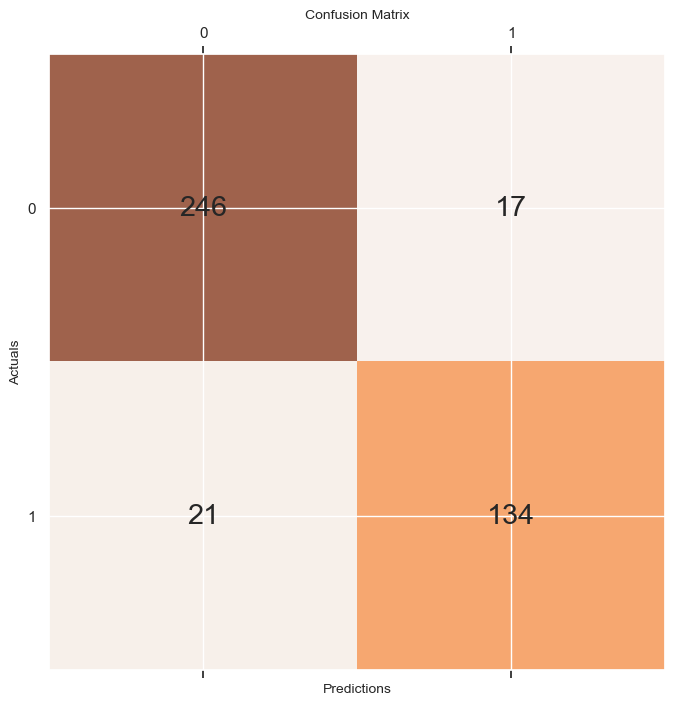

In [49]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.7)
for i in range(conf_matrix.shape[1]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

## Support Vector Machines

In [50]:
# Create 3 SVM Classifiers
linear_SVM = svm.SVC(kernel="linear") # Linear Kernel
sigmoid_SVM = svm.SVC(kernel="sigmoid") # Sigmoid Kernel
rbf_SVM = svm.SVC(kernel="rbf") # RBF Kernel

# Train the Models
linear_SVM.fit(X_train, y_train)
sigmoid_SVM.fit(X_train, y_train)
rbf_SVM.fit(X_train, y_train)

# Make Prediction
y_pred_linear = linear_SVM.predict(X_test)
y_pred_sigmoid = sigmoid_SVM.predict(X_test)
y_pred_rbf = rbf_SVM.predict(X_test)

# Calculate Accuracy of the Model (Accuracy should be close to 1 for more accurate result)
print("Accuracy (linear) :", metrics.accuracy_score(y_test, y_pred_linear))
print("Accuracy (sigmoid) :", metrics.accuracy_score(y_test, y_pred_sigmoid))
print("Accuracy (rbf) :", metrics.accuracy_score(y_test, y_pred_rbf))

Accuracy (linear) : 0.9066985645933014
Accuracy (sigmoid) : 0.7416267942583732
Accuracy (rbf) : 0.8923444976076556


## Gaussian Naive Bayes

In [51]:
# Create Naive Bayes Gaussian Model
gaussian_model = GaussianNB()

# Train the Model
gaussian_model.fit(X_train, y_train)

# Make Prediction
y_pred = gaussian_model.predict(X_test)

# Accuarcy
print("Accuarcy :", metrics.accuracy_score(y_test, y_pred))

# Calculate Accuracy of the Model (For higher accuracy, Rsquared should be closer to 1 and Errors to 0)
meanAbError = metrics.mean_absolute_error(y_test, y_pred)
meanSqError = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqrr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("R squared : {:.2f}".format(Log_reg.score(X_test, y_test)))
print("Mean Absolute Error :", meanAbError)
print("Mean Square Error :", meanSqError)
print("Root Mean Square Error :", rootMeanSqrr)

Accuarcy : 0.9090909090909091
R squared : 0.91
Mean Absolute Error : 0.09090909090909091
Mean Square Error : 0.09090909090909091
Root Mean Square Error : 0.30151134457776363


In [52]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[246,  17],
       [ 21, 134]], dtype=int64)